# 📘 Notebook 1 — Exploring Raw Electron Tracks

**Goal**: Get familiar with electron track data: structure, scale, and visual appearance  
**Scope**: Load raw tracks, visualize them in 3D, explore how energy and topology relate

---

## 🧠 Background

Each track represents an electron propagating through a Time Projection Chamber (TPC), simulated in liquid argon.  
We capture:
- 3D charge deposition (`r`)
- Charge intensity at each point (`num_e`)
- Ground truth properties from associated metadata files

This notebook helps you explore the raw data and build an intuition for track shapes and behavior.

---

## 📂 Data Structure

In [2]:
"""
example_data/
└── electrons/
├── E0000100/   ← 100 keV
├── E0001000/   ← 1 MeV
└── E0050000/   ← 5 MeV
...


Each folder contains:
- `.npz` files: track data
- `.pickle` files: truth metadata (origin, direction, interaction type)
"""

## 🧰 Setup and Imports

import os
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
from Gampy.tools import tracks_tools



## 📦 Load a Track
"""
**First**: Go and explore the file structure and the naming conventions. Each E00###### has 10 .npz and .pickle files
.npz files contain the raw track information (3D positions and charge)
.pickle files contain "Truth" information i.e. what created them, where was the first interaction, what angle it came from etc. 

"""
# Choose one electron track file
folder = '../example_data/electrons/E0001000'
track_file = glob.glob(os.path.join(folder, 'TrackE*.npz'))[0]

# Extract energy from filename (in keV)
energy = int(track_file.split("TrackE")[1].split("_")[0])

# Initialize the Track object (this will load the npz and pickle file) 
track = tracks_tools.Tracks(track_file.rstrip('.npz'))

Reading tracks in TrackE0001000_D20250527_T1337070955.npz


At this point it is good to explore the attributes of the Track object.

In [ ]:
print(dict(track.__dict__).keys())

For each attribute, explore the keys it has and gat familiar with their meaning, for example:

In [ ]:
print(track.truth.keys())

Documentation about the Track class can be found here:

https://github.com/tashutt/Gampy/blob/main/tools/tracks_tools.py

---

## 🔎 Examine Track Properties

In [3]:
truth = track.truth
positions = track.raw['r'].T                # shape: (N, 3)
charges = track.raw['num_e']                # shape: (N,)

print(f"Track energy:           {energy / 1000:.1f} MeV")
print(f"Number of points:       {len(positions)}")
print(f"Total deposited charge: {charges.sum():.1f} e⁻")

# Optionally examine truth
print(f"True origin:            {truth['origin']}")
print(f"Initial direction:      {truth['initial_direction']}")

Track energy:           1.0 MeV
Number of points:       12392
Total deposited charge: 29876.0 e⁻
True origin:            [0. 0. 0.]
Initial direction:      [ 0.47545556 -0.31154127  0.82272963]


---

## 🎨 Visualize the Track in 3D

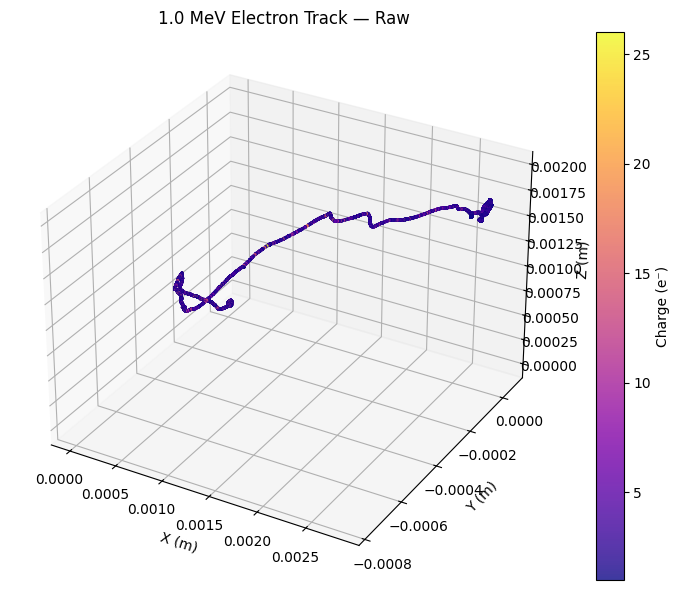

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2],
                c=charges, cmap='plasma', s=2, alpha=0.8)

ax.set_title(f"{energy / 1000:.1f} MeV Electron Track — Raw")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

plt.colorbar(sc, label="Charge (e⁻)")
plt.tight_layout()
plt.show()

---

## 🧠 Challenge 1 — Show the origin and initial direction using truth data

[] :)

---

## 🧠 Challenge 2 — Energy Scaling

**Visualize tracks at different energies to compare spread and structure.**

Reading tracks in TrackE0000100_D20250527_T1337999466.npz
Reading tracks in TrackE0001000_D20250527_T1337070955.npz
Reading tracks in TrackE0005000_D20250527_T1337710275.npz


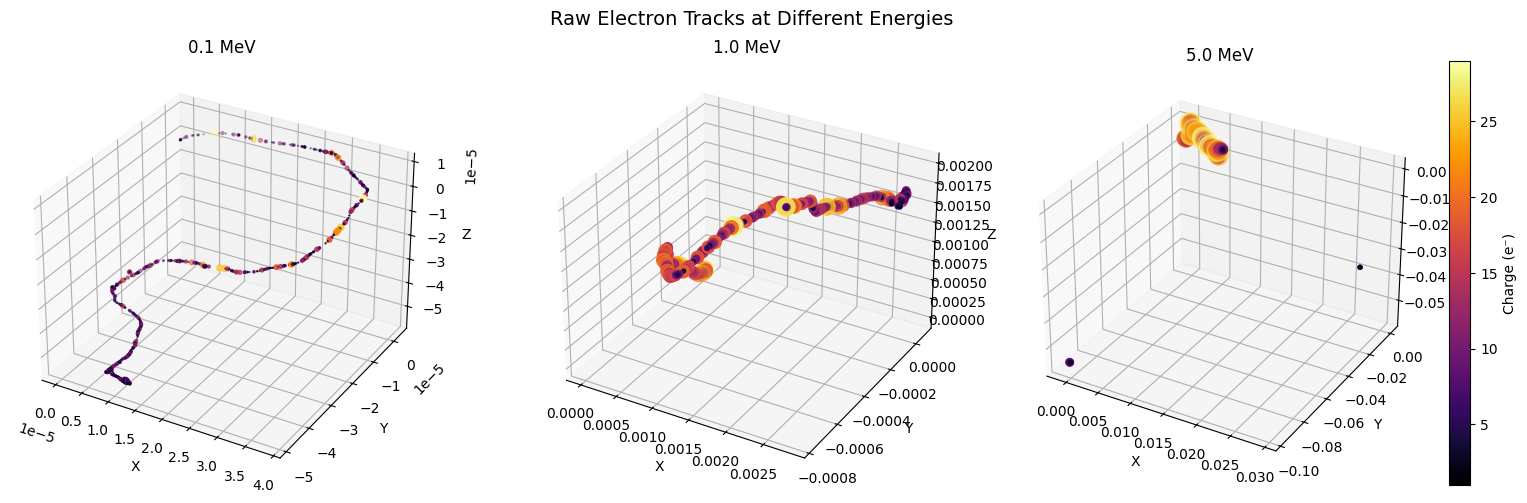

In [16]:
energies = [100, 1000, 5000]  # keV
folders = [f"../example_data/electrons/E{e:07d}" for e in energies]
files = [glob.glob(os.path.join(folder, 'TrackE*.npz'))[0] for folder in folders]

fig = plt.figure(figsize=(16, 5))

for i, file in enumerate(files):
    tr = tracks_tools.Tracks(file.rstrip('.npz'))
    pos = tr.raw['r'].T
    ch = tr.raw['num_e']

    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], c=ch, cmap='inferno', s=0.3 * ch ** 2)
    ax.set_title(f"{energies[i] / 1000:.1f} MeV")
    ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
    ax.grid(True)

plt.suptitle("Raw Electron Tracks at Different Energies", fontsize=14)
plt.colorbar(ax.collections[0], ax=ax, label="Charge (e⁻)", orientation='vertical')
plt.tight_layout()
plt.show()

Reading tracks in TrackE0000100_D20250527_T1337999466.npz
Reading tracks in TrackE0000300_D20250527_T1337581443.npz
Reading tracks in TrackE0000500_D20250527_T1337670890.npz
Reading tracks in TrackE0001000_D20250527_T1337070955.npz
Reading tracks in TrackE0003000_D20250527_T1337738027.npz
Reading tracks in TrackE0005000_D20250527_T1337710275.npz
Reading tracks in TrackE0010000_D20250527_T1338907053.npz
Reading tracks in TrackE0020000_D20250527_T1337808995.npz
Reading tracks in TrackE0050000_D20250527_T1337553946.npz


Text(0, 0.5, 'log Total Charge (e⁻)')

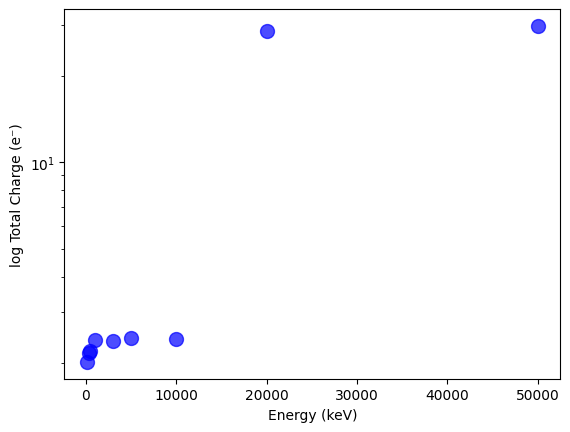

In [36]:
energies = [100, 300, 500, 1000, 3000, 5000, 10000, 20000, 50000]  # keV
folders = [f"../example_data/electrons/E{e:07d}" for e in energies]
files = [glob.glob(os.path.join(folder, 'TrackE*.npz'))[0] for folder in folders]

# fig = plt.figure(figsize=(16, 5))

Qs = np.float64(energies) * 0.0

for i, file in enumerate(files):
    tr = tracks_tools.Tracks(file.rstrip('.npz'))
    pos = tr.raw['r'].T
    ch = tr.raw['num_e']
    Qs[i] = ch.mean()

plt.scatter(energies, Qs, color='blue', s=100, alpha=0.7)
plt.yscale('log')
plt.xlabel("Energy (keV)")
plt.ylabel("log Total Charge (e⁻)")


* How does the spatial extent change?
* Do higher energies result in longer or more branched tracks?

b) Plot the total average charge [Q] vs the energy [in keV]. Use all the available energies in the electron folder. 

---

## 🧠 Challenge 3 — Track Extent

**Compute the physical size of the track.**

In [35]:
extent = positions.max(axis=0) - positions.min(axis=0)
print(f"Track extent (X, Y, Z): {extent} meters")

Track extent (X, Y, Z): [0.0028303  0.00083388 0.00198028] meters


In [ ]:
energies = [100, 300, 500, 1000, 3000, 5000, 10000, 20000, 50000]  # keV
folders = [f"../example_data/electrons/E{e:07d}" for e in energies]
files = [glob.glob(os.path.join(folder, 'TrackE*.npz'))[0] for folder in folders]

# fig = plt.figure(figsize=(16, 5))

Qs = np.float64(energies) * 0.0

for i, file in enumerate(files):
    tr = tracks_tools.Tracks(file.rstrip('.npz'))
    pos = tr.raw['r'].T
    ch = tr.raw['num_e']
    Qs[i] = ch.mean()

plt.scatter(energies, Qs, color='blue', s=100, alpha=0.7)
plt.yscale('log')
plt.xlabel("Energy (keV)")
plt.ylabel("log Total Charge (e⁻)")


Generalize this to find the "Bounding Radius"

b) Plot the average extent [in mm] vs the energy [in keV]. Use all the available energies in the electron folder. 

---

## ✅ Summary

You have:

* Loaded and explored real simulated tracks from electron interactions
* Visualized 3D charge distributions
* Observed energy-dependent changes in track topology

You now have a basic grasp of:

* What an electron track looks like
* How charge is spatially deposited
* What truth data accompanies each track